# Bayesian Online Changepoint Detection

A notebook exploring BOCD using the `bayescd` package for BOCD in Python.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from datetime import datetime

import numpy as np

new_path = os.getcwd().replace('/notebooks', '')
print(f'Adding {new_path} to sys.path')

if new_path not in sys.path:
    sys.path.append(new_path)

# Local imports
from curvemetrics.src.classes.datahandler import DataHandler
from curvemetrics.src.classes.datafetcher import DataFetcher
from curvemetrics.src.classes.metricsprocessor import MetricsProcessor
from curvemetrics.src.detection.bocd import bocd
from curvemetrics.src.plotting.plot import bocd_plot_dm, bocd_plot

Adding /root/curve-lp-metrics to sys.path
Use scipy logsumexp().


In [3]:
datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()
pool_metadata = datahandler.get_pool_metadata()

pool = "0xceaf7747579696a2f0bb206a14210e3c9e6fb269" # UST

start_ts, start_block = DataFetcher.get_block(datetime.fromisoformat("2022-04-01"))
end_ts, end_block = DataFetcher.get_block(datetime.fromisoformat("2022-06-01"))

In [4]:
swaps_data = datahandler.get_swaps_data(pool, start_ts, end_ts)
lp_data = datahandler.get_lp_data(pool, start_ts, end_ts)
pool_data = datahandler.get_pool_data(pool, start_ts, end_ts)
tokens = {token_metadata[v]['symbol']:v for v in set(swaps_data['tokenBought'])}

In [5]:
ohlcvs = {}
for k, v in tokens.items():
    if k == "3Crv":
        continue
    ohlcv = datahandler.get_ohlcv_data(v, start=start_ts, end=end_ts)
    ohlcvs[k] = ohlcv

In [6]:
metricsprocessor = MetricsProcessor(pool_metadata, token_metadata, freq='1h')
pool_metrics = metricsprocessor.process_metrics_for_pool(pool, pool_data, swaps_data, lp_data, ohlcvs)

<Axes: xlabel='timestamp'>

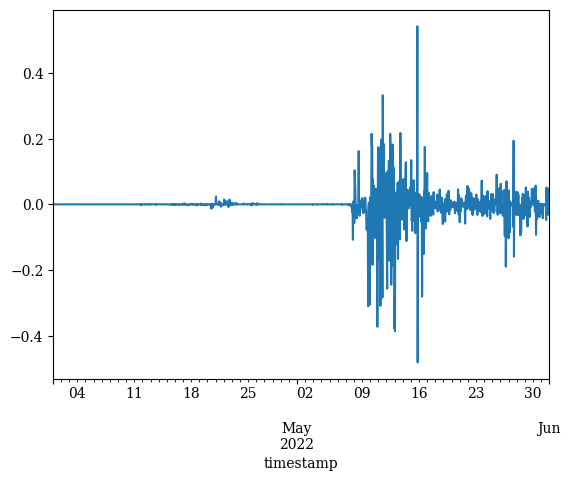

In [7]:
metric = np.log1p(pool_metrics['shannonsEntropy'].pct_change()).dropna()
metric.plot()

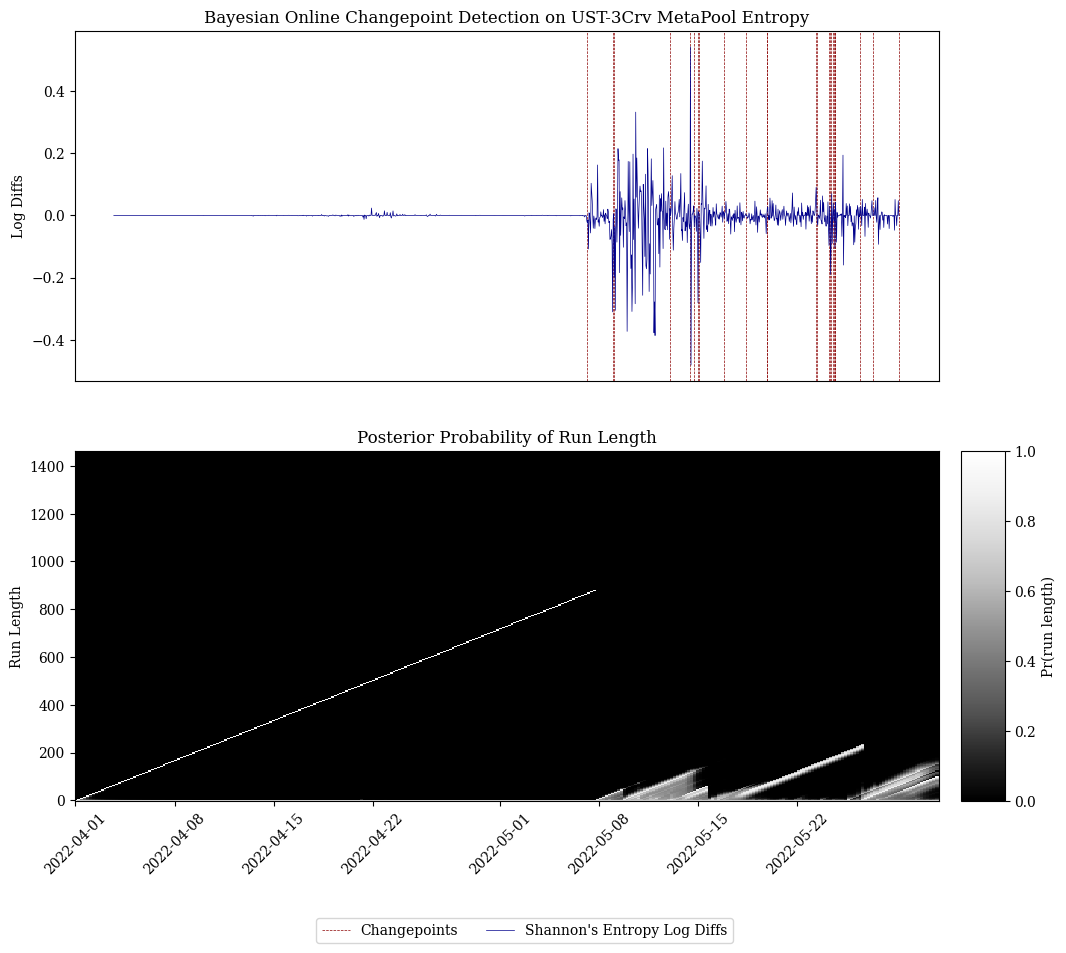

In [9]:
title = 'Bayesian Online Changepoint Detection on UST-3Crv MetaPool Entropy'
label = 'Shannon\'s Entropy Log Diffs'
ylab = 'Log Diffs'
file = '../figs/bocd_ust_shannon.png'

R, maxes = bocd(metric)
bocd_plot_dm(metric, maxes, R, title=title, label=label, ylab=ylab, file=file, show=True)

<Axes: xlabel='timestamp'>

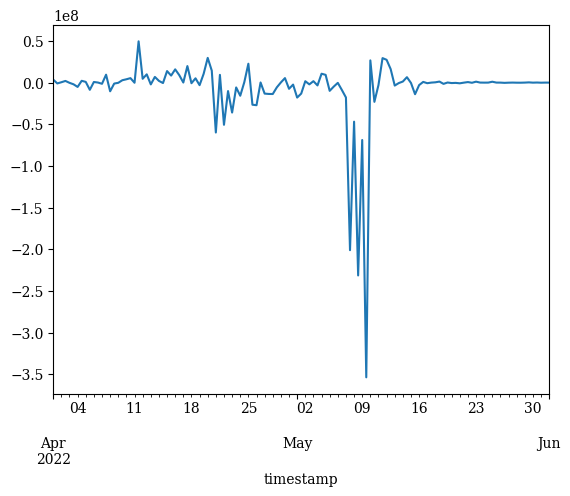

In [40]:
metric = pool_metrics['UST.netSwapFlow'].resample('12h').sum()
metric.plot()

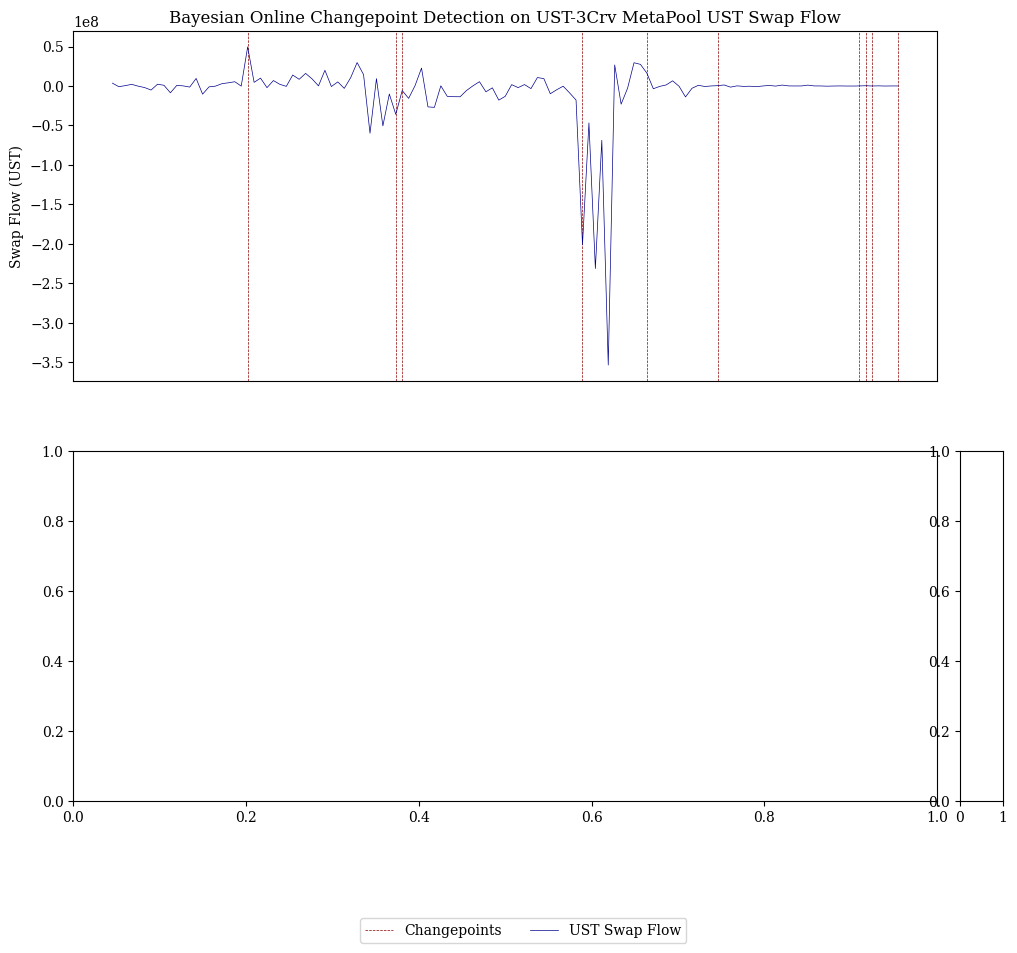

In [41]:
title = 'Bayesian Online Changepoint Detection on UST-3Crv MetaPool UST Swap Flow'
label = 'UST Swap Flow'
ylab = 'Swap Flow (UST)'
file = f'../figs/bocd_ust_swapflow_usdc.png'

R, maxes = bocd(metric)
bocd_plot(metric, maxes, R, title=title, label=label, ylab=ylab, file=file, show=True)

In [12]:
# gridsearch = {}
# for comb in combs:
    
#     a, b, k = comb

#     gridsearch[comb] = bocd(metric, alpha=a, beta=b, kappa=k)

In [41]:
title = 'Bayesian Online Changepoint Detection on UST-3Crv MetaPool UST Swap Flow'
label = 'UST Swap Flow'
ylab = 'Swap Flow (UST)'

for comb in combs:
    R, maxes = gridsearch[comb]
    a, b, k = comb
    file = f'../figs/bocd_ust_swapflow_{a}_{b}_{k}.png'
    bocd_plot(metric, maxes, R, title=title, label=label, ylab=ylab, file=file)

/root/curve-lp-metrics/curvemetrics/src/plotting/plot.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=[12, 10])


Error in callback <function _draw_all_if_interactive at 0x7fe81ec54700> (for post_execute):


KeyboardInterrupt: 